# Chapter 9 Homework

In [1]:
# Imports

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from dmba import plotDecisionTree, classificationSummary, regressionSummary
import os

no display found. Using non-interactive Agg backend


In [2]:
# Directory

working_directory = os.getcwd()
print(working_directory)

/Users/pouyasohrab


In [3]:
# Defining the Data Frame

path = working_directory + '/dmba/eBayAuctions.csv'
df = pd.read_csv(path)

# Analyze DataFrame

In [4]:
df.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [5]:
df.describe()

,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000
mean,3560.238337,6.486308,36.449087,12.926268,0.540568
std,5973.011033,2.052906,89.493858,38.856149,0.498478
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,595.000000,5.000000,4.907500,1.230000,0.000000
50%,1853.000000,7.000000,9.995000,4.500000,1.000000
75%,3380.000000,7.000000,28.000000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [6]:
df.dtypes

Category         object
currency         object
sellerRating      int64
Duration          int64
endDay           object
ClosePrice      float64
OpenPrice       float64
Competitive?      int64
dtype: object

In [7]:
list(df)

['Category',
 'currency',
 'sellerRating',
 'Duration',
 'endDay',
 'ClosePrice',
 'OpenPrice',
 'Competitive?']

In [8]:
df["Competitive?"]

0       0
1       0
2       0
3       0
4       0
       ..
1967    0
1968    1
1969    0
1970    1
1971    0
Name: Competitive?, Length: 1972, dtype: int64

# Pre-Process DataFrame

In [9]:
df['Duration'] = df['Duration'].astype('category')

In [10]:
df.dtypes

Category          object
currency          object
sellerRating       int64
Duration        category
endDay            object
ClosePrice       float64
OpenPrice        float64
Competitive?       int64
dtype: object

In [11]:
# Split Data

df = pd.get_dummies(df, drop_first=True)

X = df.drop(columns = 'Competitive?')
y = df['Competitive?']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)
print(train_X.shape, train_y.shape)

(1183, 32) (1183,)


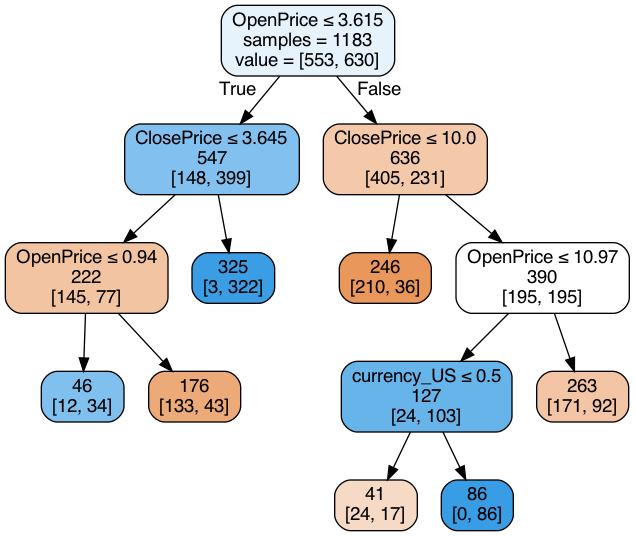

In [12]:
# 9.1.a

smallClassTree = DecisionTreeClassifier(max_depth=7, min_samples_split=50,
                        min_impurity_decrease=0.01, random_state=1)
smallClassTree.fit(train_X, train_y)
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [13]:
accuracy = smallClassTree.score(valid_X, valid_y)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.7908745247148289


In [14]:
accuracy2 = smallClassTree.score(train_X, train_y)
print("Training Accuracy:", accuracy2)

Training Accuracy: 0.8284023668639053


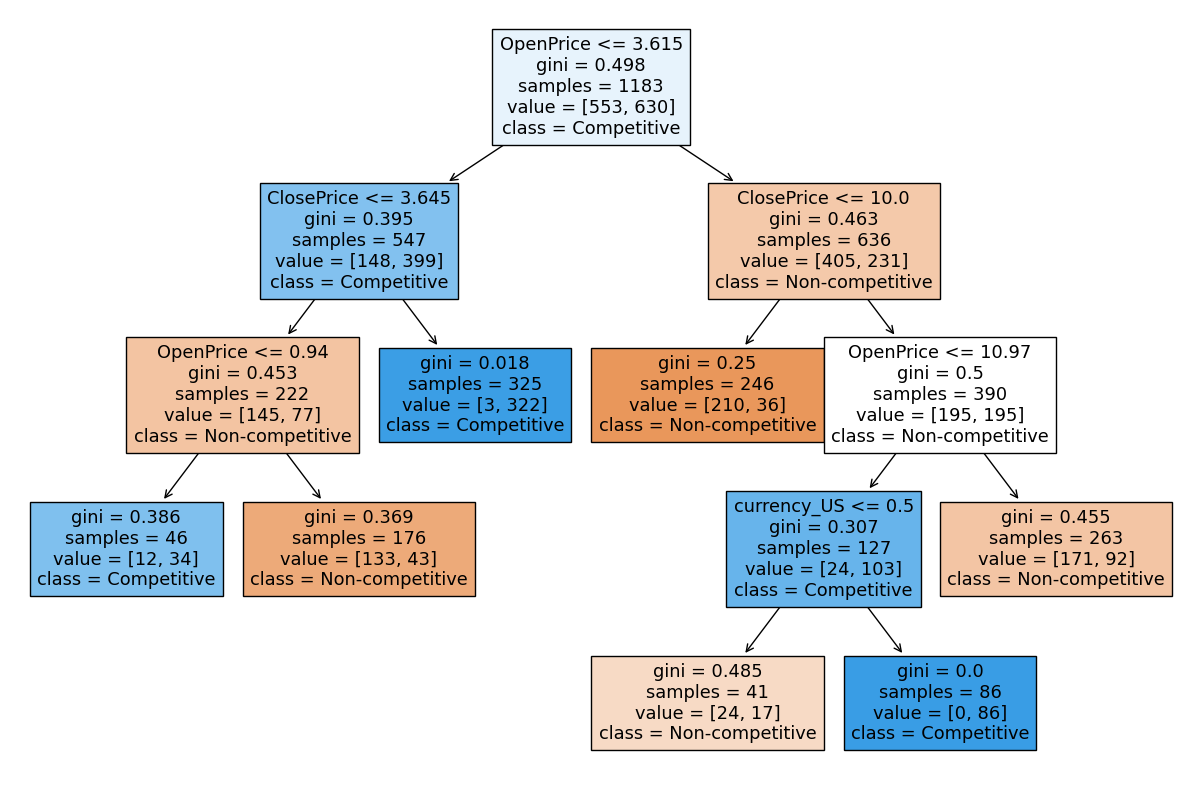

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15, 10))
plot_tree(smallClassTree, feature_names=train_X.columns, class_names=["Non-competitive", "Competitive"], filled=True)
plt.show()

In [16]:
# Rules

print(export_text(smallClassTree,
                  show_weights=True))

|--- feature_2 <= 3.62
|   |--- feature_1 <= 3.64
|   |   |--- feature_2 <= 0.94
|   |   |   |--- weights: [12.00, 34.00] class: 1
|   |   |--- feature_2 >  0.94
|   |   |   |--- weights: [133.00, 43.00] class: 0
|   |--- feature_1 >  3.64
|   |   |--- weights: [3.00, 322.00] class: 1
|--- feature_2 >  3.62
|   |--- feature_1 <= 10.00
|   |   |--- weights: [210.00, 36.00] class: 0
|   |--- feature_1 >  10.00
|   |   |--- feature_2 <= 10.97
|   |   |   |--- feature_21 <= 0.50
|   |   |   |   |--- weights: [24.00, 17.00] class: 0
|   |   |   |--- feature_21 >  0.50
|   |   |   |   |--- weights: [0.00, 86.00] class: 1
|   |   |--- feature_2 >  10.97
|   |   |   |--- weights: [171.00, 92.00] class: 0



# Rules

1) If OpenPrice <= 3.615000009536743: If ClosePrice <= 3.6449999809265137: If OpenPrice <= 0.9399999976158142: Classify as: 1

2) If OpenPrice > 0.9399999976158142: Classify as: 0

3) If ClosePrice > 3.6449999809265137: Classify as: 1

4) If OpenPrice > 3.615000009536743 If ClosePrice <= 10.0: Classify as: 0

5) If ClosePrice > 10.0 If OpenPrice <= 10.96999979019165: If currency_US <= 0.5: Classify as: 0

6) If currency_US > 0.5: Classify as: 1

7) If OpenPrice > 10.96999979019165: Classify as: 0

In [17]:
# Checking important variables

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df2 = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df2 = df2.sort_values('importance')
print(df2)
classificationSummary(valid_y, rf.predict(valid_X))

                          feature  importance       std
11        Category_EverythingElse    0.001918  0.002647
16           Category_Photography    0.002615  0.003211
17         Category_Pottery/Glass    0.004047  0.003616
9               Category_Computer    0.004548  0.004176
5    Category_Business/Industrial    0.005068  0.003862
10           Category_Electronics    0.005664  0.004306
31                     endDay_Wed    0.006045  0.004579
7           Category_Coins/Stamps    0.006206  0.005103
13           Category_Home/Garden    0.006620  0.004637
14               Category_Jewelry    0.006911  0.004953
20                   currency_GBP    0.007119  0.006204
29                     endDay_Thu    0.007342  0.005501
22                     Duration_3    0.007546  0.005110
30                     endDay_Tue    0.008936  0.005434
6   Category_Clothing/Accessories    0.009003  0.005815
25                    Duration_10    0.009110  0.006624
4                  Category_Books    0.009774  0

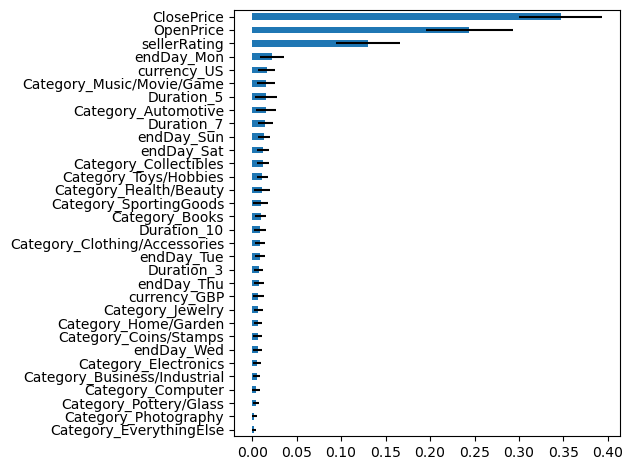

In [18]:
# Checking important variables

ax = df2.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
%matplotlib inline
plt.tight_layout()
plt.show()

# 9.1.a

Based on the importance graph and statistics, I could get rid of a lot of features such as "Category_EverythingElse"

In [19]:
# Train

classificationSummary(train_y, smallClassTree.predict(train_X))

Confusion Matrix (Accuracy 0.8284)

       Prediction
Actual   0   1
     0 538  15
     1 188 442


In [20]:
# Valid

classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.7909)

       Prediction
Actual   0   1
     0 343  10
     1 155 281


# 1.b

This model is somewhat practical considering the variability of the data but the accuracy of the model is very low on the validation and training set which indicates it can not predict the classififcation of competitive listings very accurately.

# 1.c

The model's key findings reveal that low values of OpenPrice and ClosePrice (<=3.615 and <=3.645, respectively) strongly indicate a competitive auction (class 1). Additionally, the presence of currency_US with values greater than 0.5 also suggests a competitive auction.

In [21]:
print(df.columns)

Index(['sellerRating', 'ClosePrice', 'OpenPrice', 'Competitive?',
       'Category_Automotive', 'Category_Books', 'Category_Business/Industrial',
       'Category_Clothing/Accessories', 'Category_Coins/Stamps',
       'Category_Collectibles', 'Category_Computer', 'Category_Electronics',
       'Category_EverythingElse', 'Category_Health/Beauty',
       'Category_Home/Garden', 'Category_Jewelry', 'Category_Music/Movie/Game',
       'Category_Photography', 'Category_Pottery/Glass',
       'Category_SportingGoods', 'Category_Toys/Hobbies', 'currency_GBP',
       'currency_US', 'Duration_3', 'Duration_5', 'Duration_7', 'Duration_10',
       'endDay_Mon', 'endDay_Sat', 'endDay_Sun', 'endDay_Thu', 'endDay_Tue',
       'endDay_Wed'],
      dtype='object')


In [22]:
# Finding best predictors for Competitive?

c_matrix = df.corr()
target = c_matrix['Competitive?'].abs().sort_values(ascending=False)
new_predictors = target[1:]
new_predictors

ClosePrice                       0.178458
endDay_Mon                       0.165297
Duration_5                       0.163108
Category_Health/Beauty           0.135497
Category_Automotive              0.117966
endDay_Sat                       0.105716
Duration_7                       0.101223
OpenPrice                        0.096646
Category_SportingGoods           0.096284
Category_Electronics             0.088178
currency_GBP                     0.083435
Category_Jewelry                 0.073025
Category_Coins/Stamps            0.067502
Category_Music/Movie/Game        0.063468
Duration_3                       0.062749
currency_US                      0.058688
Category_EverythingElse          0.057122
Category_Home/Garden             0.054501
endDay_Sun                       0.050524
Category_Photography             0.049952
endDay_Thu                       0.042973
Category_Pottery/Glass           0.038707
Category_Computer                0.034504
sellerRating                     0

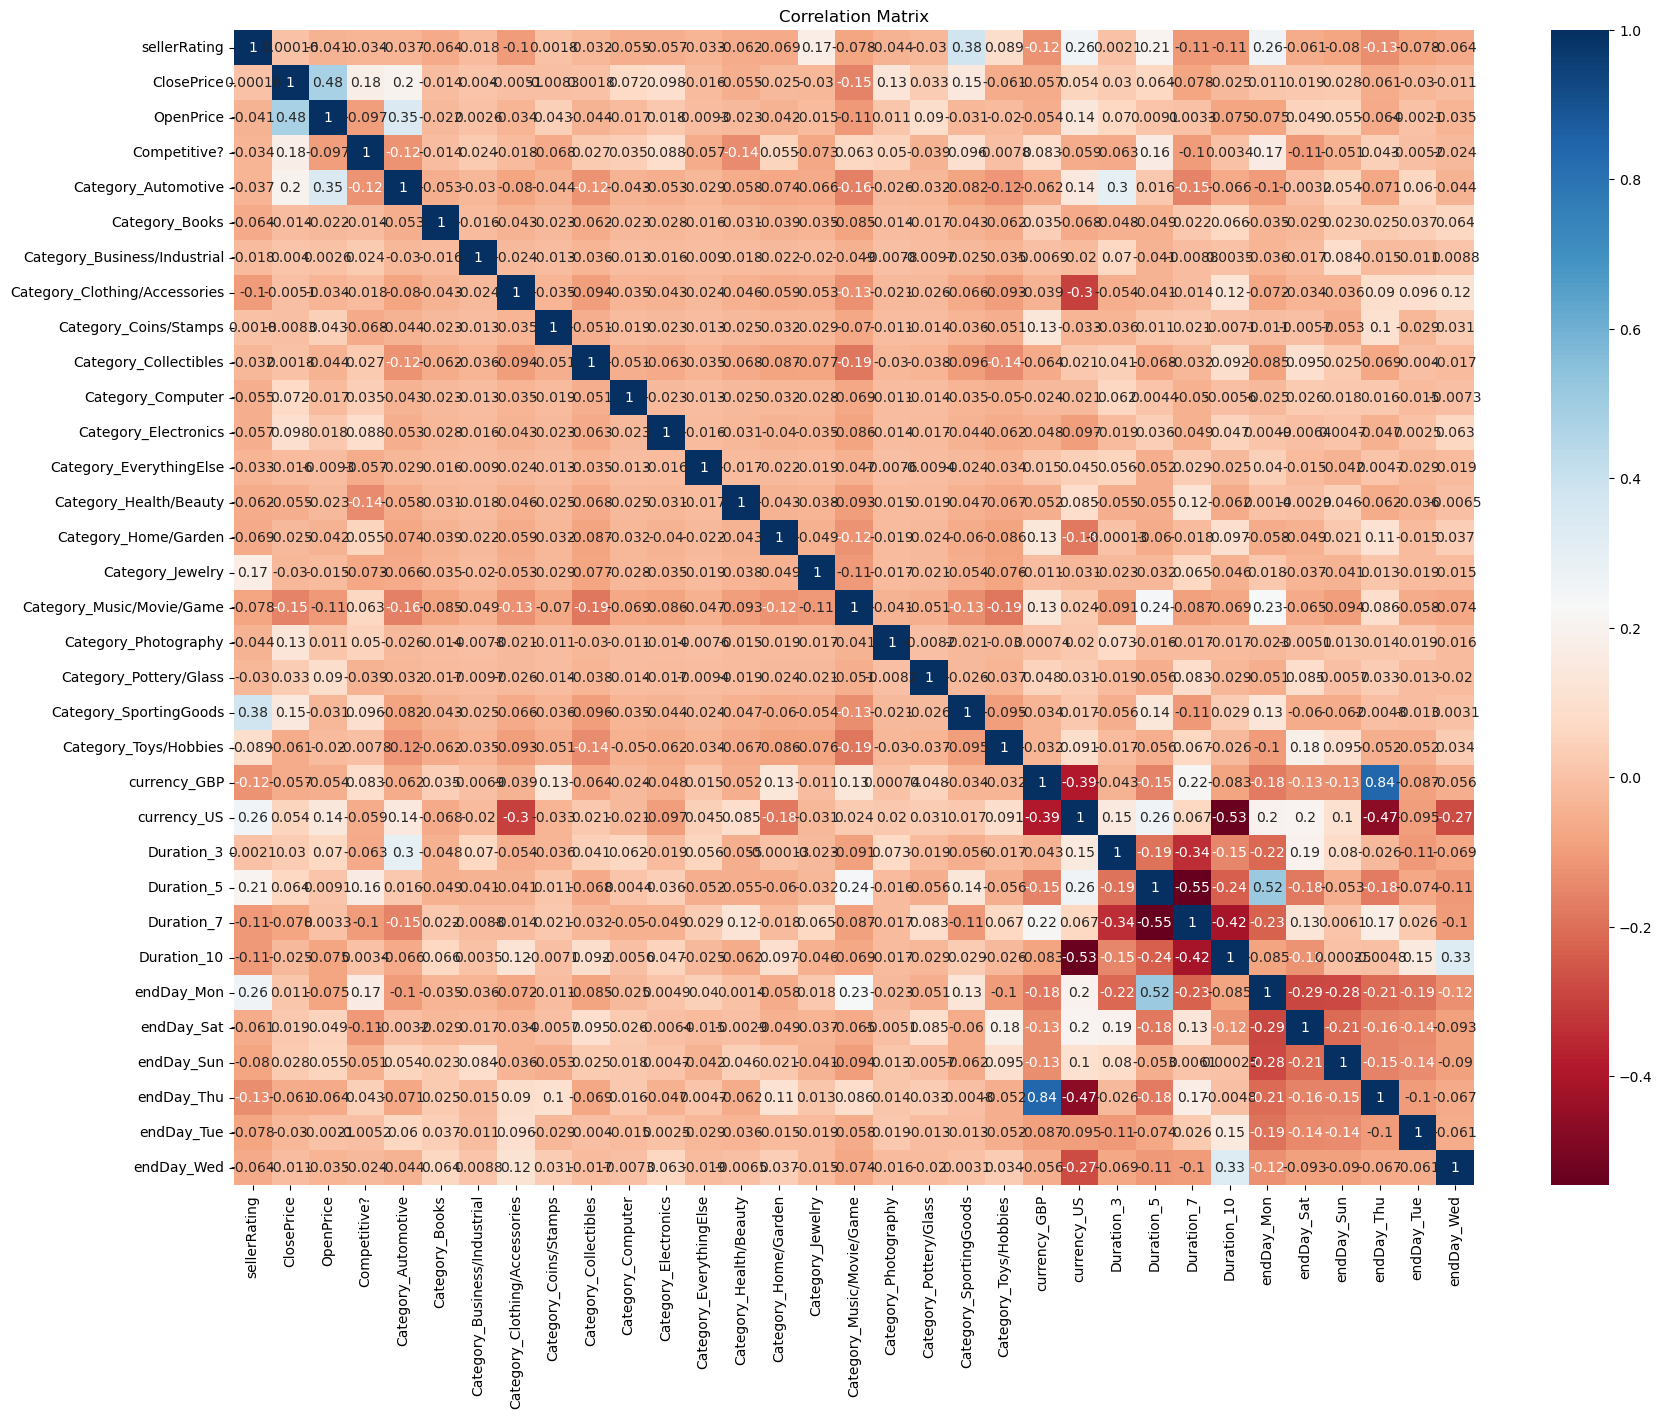

In [23]:
# Finding best predictors for Competitive?

import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(c_matrix, annot=True, cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

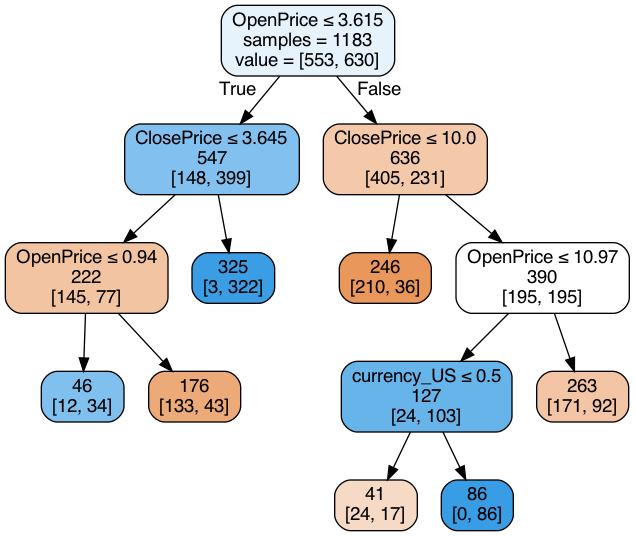

In [24]:
# 9.1.d

predictors_above05 = ['ClosePrice', 'endDay_Mon', 'Duration_5', 'Category_Health/Beauty', 'Category_Automotive',
                       'endDay_Sat', 'Duration_7', 'OpenPrice', 'Category_SportingGoods', 'Category_Electronics',
                       'currency_GBP', 'Category_Jewelry', 'Category_Coins/Stamps', 'Category_Music/Movie/Game',
                       'Duration_3', 'currency_US', 'Category_EverythingElse', 'Category_Home/Garden',
                       'endDay_Sun']

X_train_2 = train_X[predictors_above05]
X_valid_2 = valid_X[predictors_above05]

smallClassTree_2 = DecisionTreeClassifier(max_depth=7, min_samples_split=50,
                                          min_impurity_decrease=0.01, random_state=1)
smallClassTree_2.fit(X_train_2, train_y)

plotDecisionTree(smallClassTree_2, feature_names=X_train_2.columns)

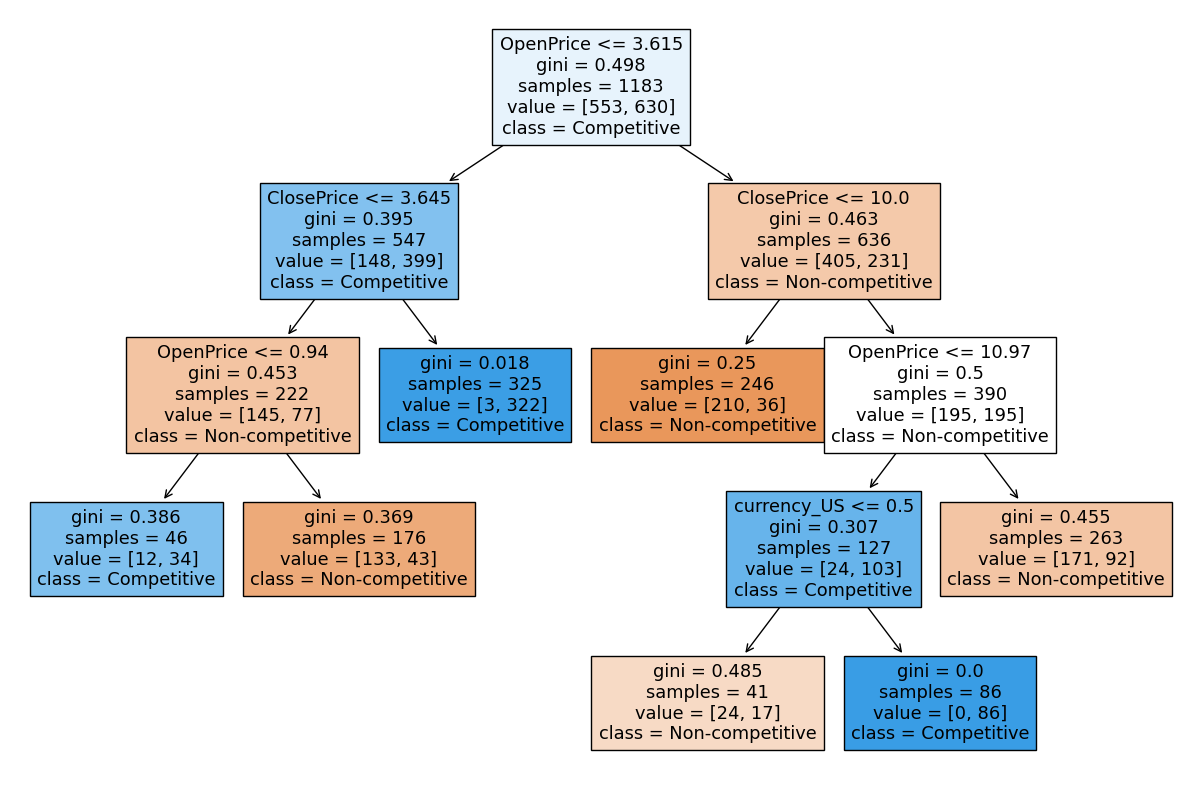

In [25]:
# Class Tree

%matplotlib inline

plt.figure(figsize=(15, 10))
plot_tree(smallClassTree_2, feature_names=X_train_2.columns, class_names=["Non-competitive", "Competitive"], filled=True)
plt.show()

In [26]:
# Rules

print(export_text(smallClassTree_2,
                  show_weights=True))

|--- feature_7 <= 3.62
|   |--- feature_0 <= 3.64
|   |   |--- feature_7 <= 0.94
|   |   |   |--- weights: [12.00, 34.00] class: 1
|   |   |--- feature_7 >  0.94
|   |   |   |--- weights: [133.00, 43.00] class: 0
|   |--- feature_0 >  3.64
|   |   |--- weights: [3.00, 322.00] class: 1
|--- feature_7 >  3.62
|   |--- feature_0 <= 10.00
|   |   |--- weights: [210.00, 36.00] class: 0
|   |--- feature_0 >  10.00
|   |   |--- feature_7 <= 10.97
|   |   |   |--- feature_15 <= 0.50
|   |   |   |   |--- weights: [24.00, 17.00] class: 0
|   |   |   |--- feature_15 >  0.50
|   |   |   |   |--- weights: [0.00, 86.00] class: 1
|   |   |--- feature_7 >  10.97
|   |   |   |--- weights: [171.00, 92.00] class: 0



In [27]:
# Checking important variables

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train_2, train_y)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df3 = pd.DataFrame({'feature': X_train_2.columns, 'importance': importances, 'std': std})
df3 = df3.sort_values('importance')
print(df3)
classificationSummary(valid_y, rf.predict(X_valid_2))

                      feature  importance       std
16    Category_EverythingElse    0.001856  0.002204
9        Category_Electronics    0.006117  0.004023
14                 Duration_3    0.008207  0.004973
11           Category_Jewelry    0.009042  0.005359
17       Category_Home/Garden    0.010044  0.005768
12      Category_Coins/Stamps    0.010202  0.005482
10               currency_GBP    0.012038  0.007880
3      Category_Health/Beauty    0.012052  0.009136
8      Category_SportingGoods    0.012364  0.007364
18                 endDay_Sun    0.015444  0.007586
5                  endDay_Sat    0.015838  0.007320
2                  Duration_5    0.016858  0.011238
6                  Duration_7    0.018613  0.009706
4         Category_Automotive    0.018630  0.012047
13  Category_Music/Movie/Game    0.018884  0.011289
15                currency_US    0.025089  0.011599
1                  endDay_Mon    0.025133  0.012643
7                   OpenPrice    0.328261  0.049154
0           

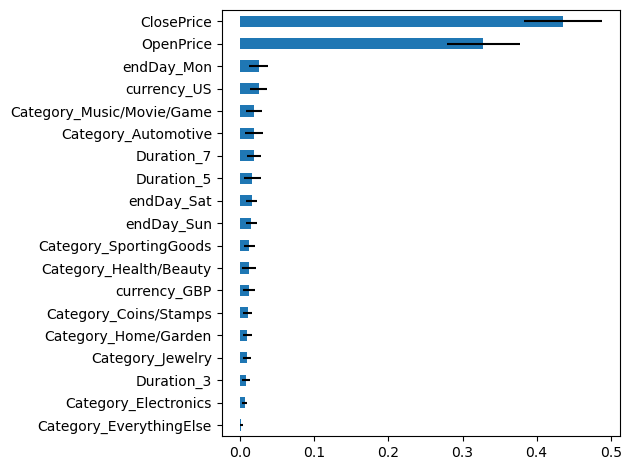

In [28]:
# Checking important variables

ax = df3.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')
%matplotlib inline
plt.tight_layout()
plt.show()

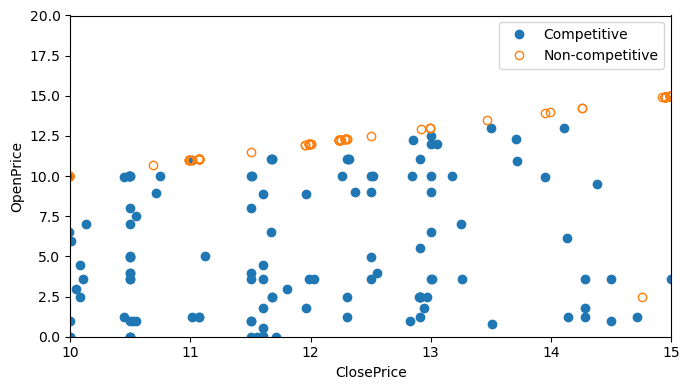

In [29]:
# 9.1.e

def basePlot(ax):
    df.loc[df['Competitive?'] == 1].plot(x='ClosePrice', y='OpenPrice', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    df.loc[df['Competitive?'] == 0].plot(x='ClosePrice', y='OpenPrice', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Competitive", "Non-competitive"]);
    ax.set_xlim(10, 15)
    ax.set_ylim(0, 20)
    ax.set_xlabel('ClosePrice')
    ax.set_ylabel('OpenPrice')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

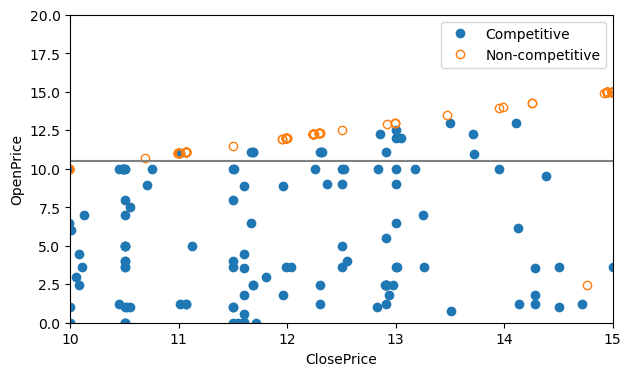

In [30]:
# 9.1.e

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)

# horizontal line
ax.axhline(y=10.5, color='grey')

plt.show()


# 9.1.e

The splitting seems relatively reasonable. It does a good job, it seems the non-competitive listings are above a 10 - 11 threshold for OpenPrice.

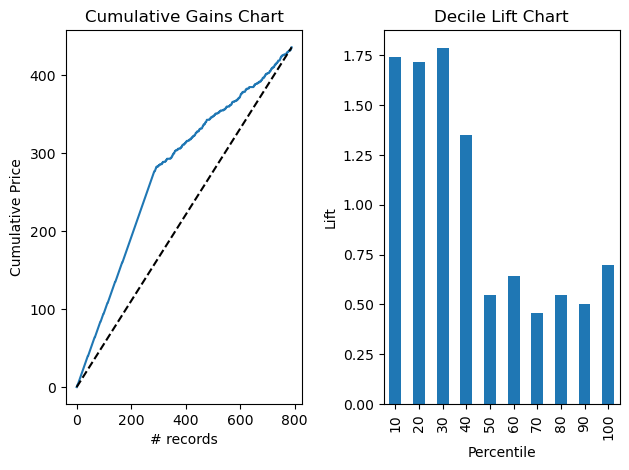

In [31]:
# 9.1.f

df4 = pd.DataFrame({
    'predicted': smallClassTree_2.predict(X_valid_2),
    'actual': valid_y, 
})
df4 = df4.sort_values(by=['predicted'], ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2)
ax = gainsChart(df4['actual'], ax=axes[0])
ax.set_ylabel('Cumulative Price')
ax.set_title('Cumulative Gains Chart')

ax = liftChart(df4['actual'], ax=axes[1], labelBars=False)
ax.set_ylabel('Lift')

plt.tight_layout()
plt.show()

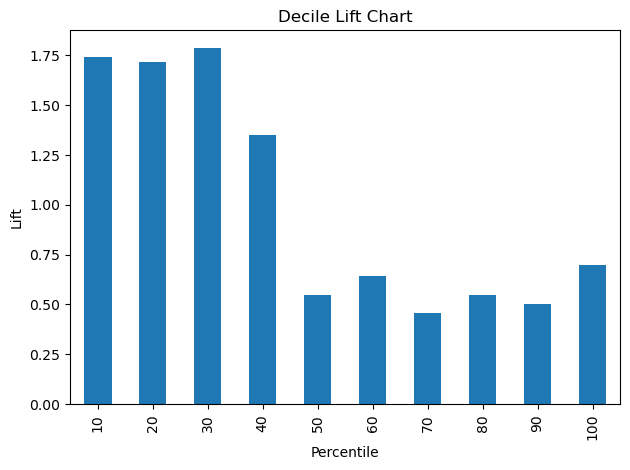

In [32]:
# 9.1.f

liftChart(df4.actual, labelBars=False)
plt.tight_layout()
plt.show()

In [33]:
# Training

classificationSummary(train_y, smallClassTree_2.predict(X_train_2))

Confusion Matrix (Accuracy 0.8284)

       Prediction
Actual   0   1
     0 538  15
     1 188 442


In [34]:
# Validation

classificationSummary(valid_y, smallClassTree_2.predict(X_valid_2))

Confusion Matrix (Accuracy 0.7909)

       Prediction
Actual   0   1
     0 343  10
     1 155 281


# 1.f

This model performs 1.75x greater than the baseline in the 30th percentile. The accuracy of the model is subpar at 79% accuracy on the validation data. Something needs to change to improve accuracy.

# 1.g

To increase the likelihood of a competitive listing, sellers should adopt the following strategies: 

Firstly, set a low opening price around or below 0.94, as it seems to attract more bids and create competition amongst potential buyers. 

Second, optimize the closing price to be below 3.64 with the opening price being low. Since this combination increases the chances of competitiveness. 

The optimization of currency and duration may not significantly influence competitiveness based on the decision trees. So, sellers can focus more on adjusting opening and closing prices for better results.